# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: Hernandez, Red Christian\
_Student No._: 2022-03646 \
_Section_: THV-TX-2 \


### Submission Information

_Date and Time Submitted (most recent upload)_: 09/18/2024 6:05pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Red Christian F. Hernandez**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [1]:
## Problem 1
import numpy as np # Call Numpy to access its functions such as arrays
def f(x): # Define the function in the problem
  return 2*x**4 + 3*x**2 + 4*x + 5

def integ_trape(N, a, b): # we define the trapezoidal rule as a function
  h = (b-a)/N # we define this as the width
  s = 0.5*f(a) + 0.5*f(b) # the initial value of s
  for k in range (1,N): # we define the summation using a loop defined by N slices
    s += f(a+k*h)
  return(h*s) # we get the value of the integration using trapezoidal rule

def integ_simp(N, a, b): # we define the trapezoidal rule as a function
  h = (b-a)/N

  s = f(a) + f(b) # we define the intial values of s
  for k in range (1,N,2): # loops over the odd values of k
    s += 4*f(a+k*h)
  for k in range (2,N,2): # loops over the even values of k
    s += 2*f(a+k*h)
  w = s*(1./3)*h # multiply 1/3 width with the value we got for s
  return(w) # we get the value of the integration using simpson's rule

N_arr = np.array([10, 100, 1000]) # we put the number of slices in an array
a = 0.0 # lower bound of integration
b = 5.0 # upper bound of integration

# we initialize the values for the integration using zero arrays
s_arr = np.zeros(len(N_arr)) # we make an zero array with the equal amount of elements to the slices array using len(function)
pct_arr = np.zeros(len(N_arr))
exact_I = 1450 # we set exact integration value for the given problem

for i in np.arange(len(N_arr)): # we iterate over the elements in the slices array using their indexes
  s_arr[i] = integ_trape(N_arr[i], a, b) # for the 0th element of array s_array(integration) we use the 0th element N(slice) then it loops over the remaining elements
  pct_arr[i] = (s_arr[i] - exact_I)/exact_I # perform percent error over the different elements of s_array(integration)
  print(N_arr[i], s_arr[i], pct_arr[i]) # print the results

for i in np.arange(len(N_arr)):
  s_arr[i] = integ_simp(N_arr[i], a, b)
  pct_arr[i] = (s_arr[i] - exact_I)/exact_I
  print(N_arr[i], s_arr[i], pct_arr[i])

  # we observe the results to be accurate to the discussion proper with margins in approximation errors
  # with a margin factor of 100 per 10 slices for the trapezoidal rule and a margin factor of 10^4 for 10 slices in the simpsons rule
  # we also verify the higher accuracy of the simpson's rule given this ingration problem

10 1471.4375 0.01478448275862069
100 1450.2145812500003 0.00014798706896569988
1000 1450.0021458331234 1.4798849127240327e-06
10 1450.0833333333333 5.7471264367763824e-05
100 1450.0000083333337 5.747126657485657e-09
1000 1450.0000000008342 5.753338035870472e-13


### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [2]:
import numpy as np

def gaussxw(N):
  # Initial approximation to roots of the Legendre polynomial
  a = np.linspace(3,4*N-1,N)/(4*N+2) # we first define an array with equalized spaced points from 3 to 4*N-1 with N number of points
                                     # these points are then normalized by dividing each point by (4*N+2)
  x = np.cos(np.pi*a+1/(8*N*N*np.tan(a))) # we further refine these approximation by plugging in the previous array into a cos() function
                                          # considering that for large N, the legendre polynomials behaves similarly additionally multiplying it to pi.
                                          # we include + 1/(8*N^2*tan(a)) as an additional correction factor for better approximation

  # Find roots using Newton's method
  epsilon = 1e-15   # we first declare a small enough epsilon value
  delta = 1.0       # and a delta value initialized at 1
  while delta > epsilon: # this iteration will keep on continuing until delta is greater than epsilon
    p0 = np.ones(N,float) # we initialize the value of P0 in the legendre recurrence formula as an array filled with 1s
                          # note that we also designate these values as floats
    p1 = np.copy(x) # we intiliaze the value of p1 in the legendre recurrence formula as an array
                    # that copies the value of the array after one iteration
    for k in range(1,N): # this declares to how many degrees of N polynomial the program wants you to evaluate
      p0,p1 = p1, ((2*k+1)*x*p1-k*p0)/(k+1) # from the legendre recurrence relation formula we derive this equation
                                            # this for loop lets p0 hold the value for Pk-1 and p1 holds the value for Pk
                                            # which are used to compute for the Pk+1
                                            # after each interation p0 becomes Pn and p1 becomes Pn+1 which is the new polynomial
                                            # for the next iteration p0 then becomes Pn-1 and p1 becomes Pn to be used to compute
                                            # for the new Pn+1 or used to compute for the derivative of the legendre formula
    dp = (N+1)*(p0-x*p1)/(1-x*x) # we get the derivative of our legendre polynomial using a known formula
                                 # we use the values p0 and p1 we got from the loop into the formula
    dx = p1/dp # then we utilize newton's method by dividing our p1 polynomial with its derivative
    x -= dx # we then subtract this value from the initial iteration of x and we get its new value
    delta = max(abs(dx))

  # Calculate the weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp) # we calculate the weight function of the legendre polynomial using this formula

  return x,w # we return the value of the weight function and the values for the best fitted legendre polynomial

def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5 # we define the function that wants to be solved

# initialize the values
N = 3 # number of slices
a = 0.0 # lower bound of the integral
b = 5.0 # upper bound of the integral

# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
# we rescales the samples points and weights of the given domain
xp = 0.5*(b-a)*x + 0.5*(b+a) #
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0 # We initilize the value of the integration as zero
for k in range(N): # For loop summation for the integral
  s += wp[k]*f(xp[k]) # We calculate the summation in order to get the approximation of the integral

print(s)

1450.000000000002


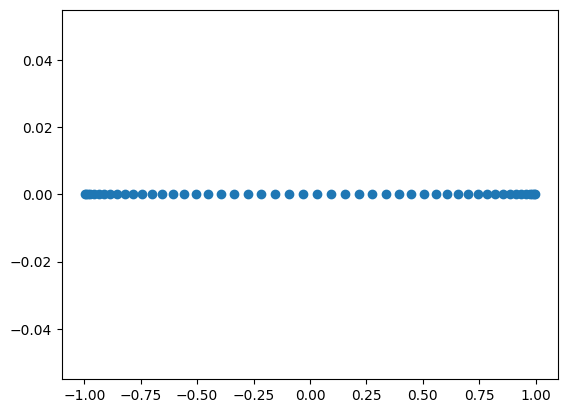

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Initial approximation to roots of the Legendre polynomial
N = 50
y = np.zeros(N)
a = np.linspace(3,4*N-1,N)/(4*N+2)
x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))
plt.plot(x, y, 'o')
plt.show()

# Just wanted to see the behavior of the approximation initialized in the problem

### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

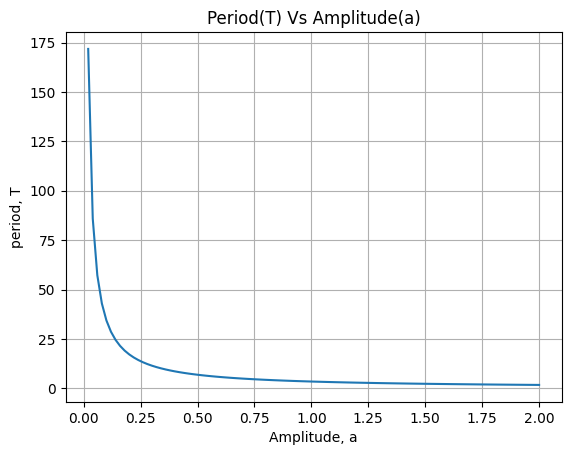

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np

def gaussxw(N):
  # Initial approximation to roots of the Legendre polynomial
  a = np.linspace(3,4*N-1,N)/(4*N+2)
  x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

  # Find roots using Newton's method
  epsilon = 1e-15
  delta = 1.0
  while delta > epsilon:
    p0 = np.ones(N,float)
    p1 = np.copy(x)
    for k in range(1,N):
      p0,p1 = p1, ((2*k+1)*x*p1-k*p0)/(k+1)
    dp = (N+1)*(p0-x*p1)/(1-x*x)
    dx = p1/dp
    x -= dx
    delta = max(abs(dx))

  # Calculate the weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

  return x,w

def V(x): # We define the potential function V(x) as v = x^4
  return x**4

def integrand(x, a): # we define the integration portion of the period in terms of V(a) and V(x)
  return 1/math.sqrt(V(a)-V(x))

# We define the initial conditions
N = 20 # number of slices
m = 1 # mass
# lower bound a cannot be defined as zero because x and a cannot be both zero or it will be undefined
a = 2.0 # upper bound of applitude

# we define the period
def T(a, N):
  # we approximate the integral t using guassian quadrature
  x, w = gaussxw(N)
  xp = 0.5*(a)*x + 0.5*(a) # We rescale the sample points and weight for the given domain
  wp = 0.5*(a)*w
  # performing the summation
  s = 0
  for k in range(1, N):
    s += wp[k]*integrand(xp[k],a)
  # multiplying the integral with the square root of 8m to get T
  return math.sqrt(8*m)*s

# Plotting Period(T) vs Amplitude(a)
N_graph = 100   # number of points
a_points = np.zeros(N_graph) # amplitude as x-axis
T_points = np.zeros(N_graph) # period as y-axis

for i in range(N_graph):
  a_points[i] = a/N_graph * (i+1) # we iterate over the values in the array given the N_graph # of points. NOTE: we don't include 0
for i in range(N_graph):
  T_points[i] = T(a_points[i], N) # we iterate over the values in the array given the N_graph # of points
# we define the plots
plt.plot(a_points, T_points)
# we define the labels
plt.title("Period(T) Vs Amplitude(a)")
plt.xlabel("Amplitude, a")
plt.ylabel("period, T")
plt.grid() # we show a grid for better reference
plt.show() # we show the graph

# we expect as we reach high values of a, the a term in the integration of the period would resemble a triangle with height 1 and base a
# thus we would be able to predict how the function would look like. In the case of a potential function of V(x) = x^4 we would expect a graph
# resembling the behavior of 1/x. thus confirming the validity of our numerical calculation

# an important case for discussion dis also the correlation between amplitude and period
# in a normal harmonic oscillator in ideal conditions, amplitude has no effect on the oscillators period
# however in the case of the anharmonic oscillator, we could observe that as the amplitude increases, there is also an increase in period